# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [48]:
df = pd.read_csv("../data/states_edu.csv")

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [49]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [50]:
# Renaming Columns
df.rename({
    'GRADES_PK_G': 'ENROLL_PREK',
    'GRADES_KG_G': 'ENROLL_KINDERGARTEN',
    'GRADES_4_G': 'ENROLL_G4',
    'GRADES_8_G': 'ENROLL_G8',
    'GRADES_12_G': 'ENROLL_G12',
    'GRADES_1_8_G': 'ENROLL_PRIMARY',
    'GRADES_9_12_G': 'ENROLL_HighSchool',
    'GRADES_ALL_G': 'ENROLL_ALL',
    'ENROLL': 'ENROLL_ALL_EST'
},
    axis=1, inplace=True)

df.isna().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL_ALL_EST                   491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
ENROLL_PREK                      173
ENROLL_KINDERGARTEN               83
ENROLL_G4                         83
ENROLL_G8                         83
ENROLL_G12                        83
ENROLL_PRIMARY                   695
ENROLL_HighSchool                644
ENROLL_ALL                        83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

We are Interested in Grade 8 Math Scores 
Thereofre, we will drop all the rows where the 8th Grade Math score is missing

In [51]:
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
df.isna().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL_ALL_EST                  205
TOTAL_REVENUE                   163
FEDERAL_REVENUE                 163
STATE_REVENUE                   163
LOCAL_REVENUE                   163
TOTAL_EXPENDITURE               163
INSTRUCTION_EXPENDITURE         163
SUPPORT_SERVICES_EXPENDITURE    163
OTHER_EXPENDITURE               205
CAPITAL_OUTLAY_EXPENDITURE      163
ENROLL_PREK                      84
ENROLL_KINDERGARTEN              74
ENROLL_G4                        74
ENROLL_G8                        74
ENROLL_G12                       74
ENROLL_PRIMARY                  205
ENROLL_HighSchool               154
ENROLL_ALL                       74
AVG_MATH_4_SCORE                 38
AVG_MATH_8_SCORE                  0
AVG_READING_4_SCORE              81
AVG_READING_8_SCORE             124
dtype: int64

In [52]:
df["ENROLL_ALL"].isna().sum()

74

In [53]:
# We check that the individual enrollments actually sum up to total enrollment
(df["ENROLL_ALL"]-df["ENROLL_PREK"]-df["ENROLL_KINDERGARTEN"] -
 df["ENROLL_PRIMARY"]-df["ENROLL_HighSchool"]).describe()

# enrollment differences as a percent
((df["ENROLL_ALL"]-df["ENROLL_PREK"]-df["ENROLL_KINDERGARTEN"] -
 df["ENROLL_PRIMARY"]-df["ENROLL_HighSchool"])/df["ENROLL_ALL"]*100).describe()

count    394.000000
mean       0.420306
std        1.090873
min        0.000000
25%        0.000000
50%        0.000000
75%        0.188212
max        7.702014
dtype: float64

We see that the difference usually matches and when it does not, it is usually small.



In [54]:
df['ENROLL_ALL'] = df['ENROLL_ALL'].fillna(
    df["ENROLL_PREK"]+df["ENROLL_PRIMARY"]+df["ENROLL_HighSchool"])
df["ENROLL_ALL"].isna().sum()
# This does not do anything because when enroll all is null it turns out that all the other enrollments are null as well, we check with the following line of code
df[df["ENROLL_ALL"].isna()][['ENROLL_PREK', 'ENROLL_PRIMARY',
                             'ENROLL_HighSchool', 'ENROLL_ALL_EST']].notna().any()

ENROLL_PREK          False
ENROLL_PRIMARY       False
ENROLL_HighSchool    False
ENROLL_ALL_EST       False
dtype: bool

In [55]:
#  There are rows with enrollment estimates so we check
df[df.ENROLL_ALL_EST.isna()]["ENROLL_ALL"].notna().sum()

# Then we see if it makes sense to fillt these with the enrollment estimates
((df["ENROLL_ALL"] - df["ENROLL_ALL_EST"]) / df["ENROLL_ALL"]).describe()

count    397.000000
mean       0.025946
std        0.051301
min       -0.096404
25%        0.003988
50%        0.013523
75%        0.031392
max        0.450693
dtype: float64

In [56]:
# Since the average error between estimated and actual enrollment is ~2.5%, I fill the missing estimates.
df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])

Now I noticed that Other expenditure has missing values and is the subtractiong of Total Expendture to all the other expenditures, so lets check if data agrees with formula

In [57]:
# Check that all expenditures add up to total expenditure
(df["TOTAL_EXPENDITURE"]-df["INSTRUCTION_EXPENDITURE"]-df["SUPPORT_SERVICES_EXPENDITURE"] -
 df["OTHER_EXPENDITURE"]-df["CAPITAL_OUTLAY_EXPENDITURE"]).describe()

count    3.970000e+02
mean     5.266562e+05
std      8.865412e+05
min      0.000000e+00
25%      7.235500e+04
50%      2.166650e+05
75%      5.578160e+05
max      5.783954e+06
dtype: float64

We see that we have a mean of 5.266e+05 which is high and we have a high variance too so I decided to do not fill those values.

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *Grade 8 Math*

How many years of data are logged in our dataset? 

In [58]:
df["YEAR"].nunique()

13

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [59]:
# Group the data by state and calculate the mean for each state
state_avg_scores = df.groupby('STATE')[['AVG_MATH_8_SCORE']].mean()

# Compare the average scores for Michigan and Ohio
Michigan_avg = state_avg_scores.loc['MICHIGAN'].mean()
Ohio_avg = state_avg_scores.loc['OHIO'].mean()

if Michigan_avg > Ohio_avg:
    print("Michigan has a higher mean score across all years.")
elif Michigan_avg < Ohio_avg:
    print("Ohio has a higher mean score across all years.")
else:
    print("Michigan and Ohio have the same mean score across all years.")

Ohio has a higher mean score across all years.


Find the average for your outcome score across all states in 2019

In [60]:
# Calculate the average outcome score across all states for 2019
average_outcome_score_all_years = df.groupby(
    'YEAR')[['AVG_MATH_8_SCORE']].mean()

average_outcome_score_2019 = average_outcome_score_all_years.loc[2019].mean()

average_outcome_score_2019

281.2641509433962

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [61]:
# Group the data by state and calculate the max for each state
state_avg_scores = df.groupby('STATE')[['AVG_MATH_8_SCORE']].max()
state_avg_scores

,AVG_MATH_8_SCORE
STATE,
ALABAMA,269.0
ALASKA,283.0
ARIZONA,283.0
ARKANSAS,279.0
CALIFORNIA,277.0
COLORADO,292.0
CONNECTICUT,289.0
DELAWARE,284.0
DISTRICT_OF_COLUMBIA,269.0


<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [62]:
# Calculate the ratio of instructional expenditure to total expenditure
df['INSTRUCTIONAL_EXPENDITURE_RATIO'] = df['INSTRUCTION_EXPENDITURE'] / \
    df['TOTAL_EXPENDITURE']
# This feature reflects the proportion of total expenditure allocated to instructional activities.

# Calculate the ratio of 8th-grade reading score to 8th-grade math score
df['READING_MATH_SCORE_RATIO'] = df['AVG_READING_8_SCORE'] / df['AVG_MATH_8_SCORE']

# A ratio greater than 1 suggests stronger reading performance relative to math,
# while a ratio less than 1 suggests stronger math performance relative to reading.

Feature engineering justification: **The first feature  reflects the proportion of total expenditure allocated to instructional activities so it can be useful on predicting student scores. The second feature added  take into account the relationship between reading and math scores, providing additional information about a student's academic profile. These allows our model to capture patterns among these 2 subjects**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '8th Grade Math Score')

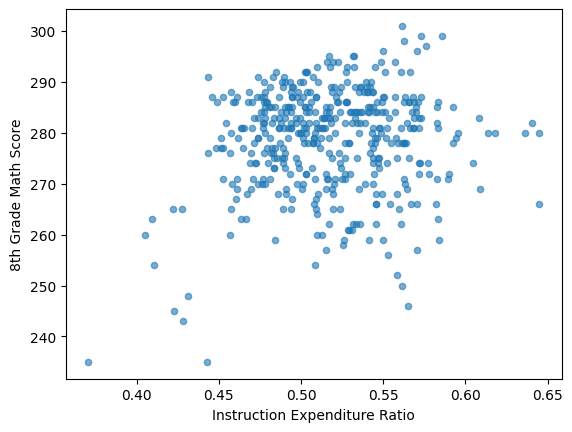

In [63]:
df.plot.scatter(x='INSTRUCTIONAL_EXPENDITURE_RATIO',
                y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Instruction Expenditure Ratio')
plt.ylabel('8th Grade Math Score')

**In this plot we see there is no correlation between the Instruction expenditure and the Average 8th grade math scores.**

**Visualization 2**

Text(0, 0.5, '8th Grade Math Score')

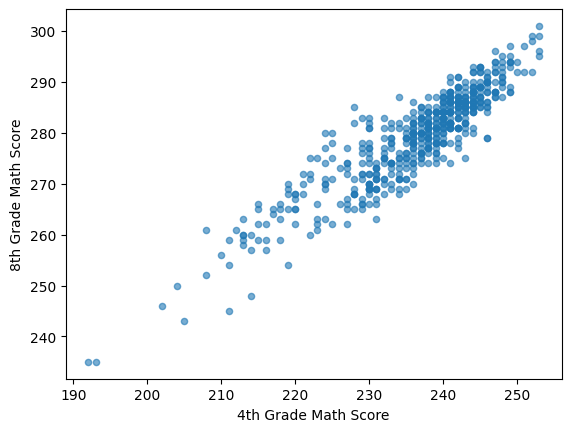

In [64]:
df.plot.scatter(x="AVG_MATH_4_SCORE", y="AVG_MATH_8_SCORE", alpha=0.6)
plt.xlabel("4th Grade Math Score")
plt.ylabel("8th Grade Math Score")

**In this plot we see there is a strong positive correlation between the Average 4th grade math scores and the Average 8th grade math scores.**

**Visualization 3**

Text(0, 0.5, '8th Grade Math Score')

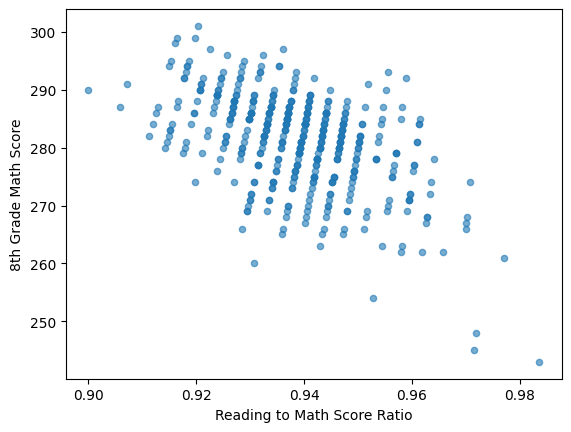

In [65]:
df.plot.scatter(x="READING_MATH_SCORE_RATIO", y="AVG_MATH_8_SCORE", alpha=0.6)
plt.xlabel("Reading to Math Score Ratio")
plt.ylabel("8th Grade Math Score")

**In this plot we see there is a weak negative correlation between the Reading to Math Score Ratio and the Average 8th grade math scores.**

**Visualization 4**

<Axes: title={'center': 'Distribution of 8th Grade Math Scores'}, ylabel='Frequency'>

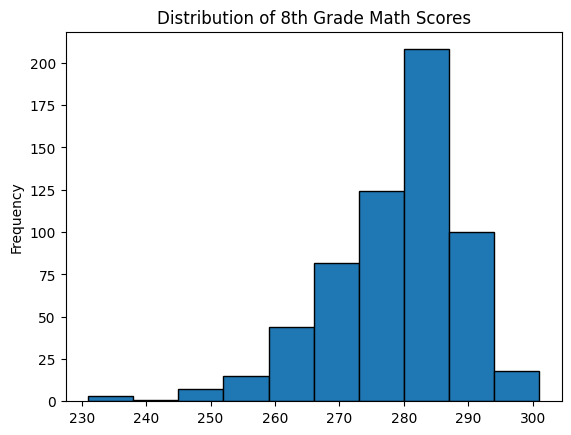

In [66]:
# note - this test is scored out of 500 according to the NAEP website
df.AVG_MATH_8_SCORE.plot.hist(
    title="Distribution of 8th Grade Math Scores", edgecolor="black")

# We can see it is left skewed

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X = df[['ENROLL_G8', 'AVG_MATH_4_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE',
        'INSTRUCTIONAL_EXPENDITURE_RATIO', 'READING_MATH_SCORE_RATIO']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

y.isna().sum()


# y has no null values so we can proceed to split the data
# In case there were nulls in y we would have to fill them using the median since it is left skewed as we see from the histogram.
y.fillna(y.median(), inplace=True)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [70]:
from sklearn.linear_model import Ridge

In [71]:
# create your model here
model = Ridge(alpha=0.6)

In [72]:
model.fit(X_train, y_train)

Ridge(alpha=0.6)

In [73]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [74]:
print("Regression Intercept", model.intercept_)
print("Regression Coefficients", model.coef_, sep="\n")

print("R^2", model.score(X_test, y_test))
print("Mean error", np.mean(model.predict(X_test)-y_test))
print("Mean absolute error", np.mean(np.abs(model.predict(X_test)-y_test)))
print("Root mean squared error", np.mean(
    (model.predict(X_test)-y_test)**2)**0.5)

Regression Intercept -37.29608890057068
Regression Coefficients
[ 1.48755978e-06  8.87584387e-01 -3.65643246e-01  7.45143292e-01
 -2.86596997e+00 -8.84416366e+00]
R^2 0.932724715763692
Mean error 0.5166089094085445
Mean absolute error 1.546622507864857
Root mean squared error 1.887564317620694


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

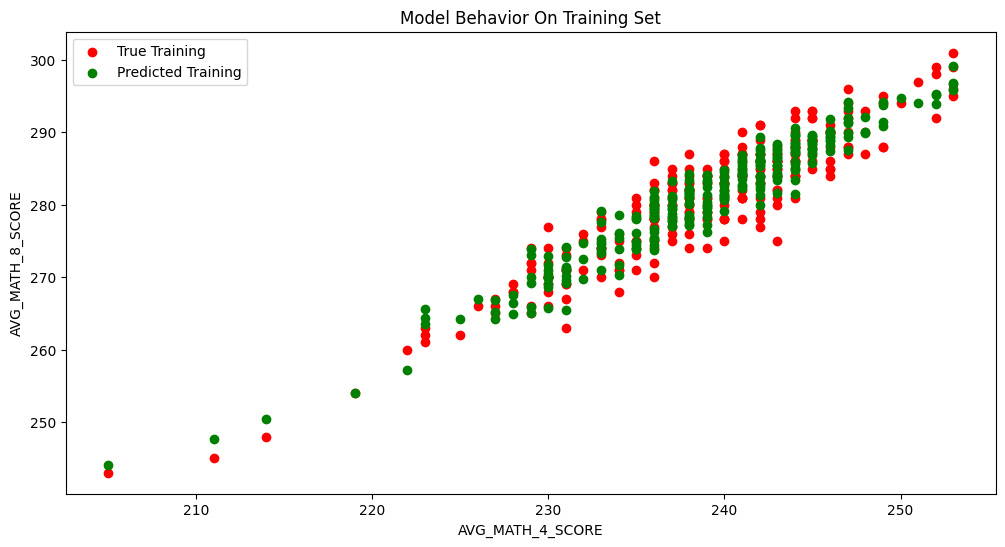

In [75]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12, 6))
plt.scatter(X_train[col_name], y_train, color="red")
plt.scatter(X_train[col_name], model.predict(X_train), color="green")

plt.legend(['True Training', 'Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

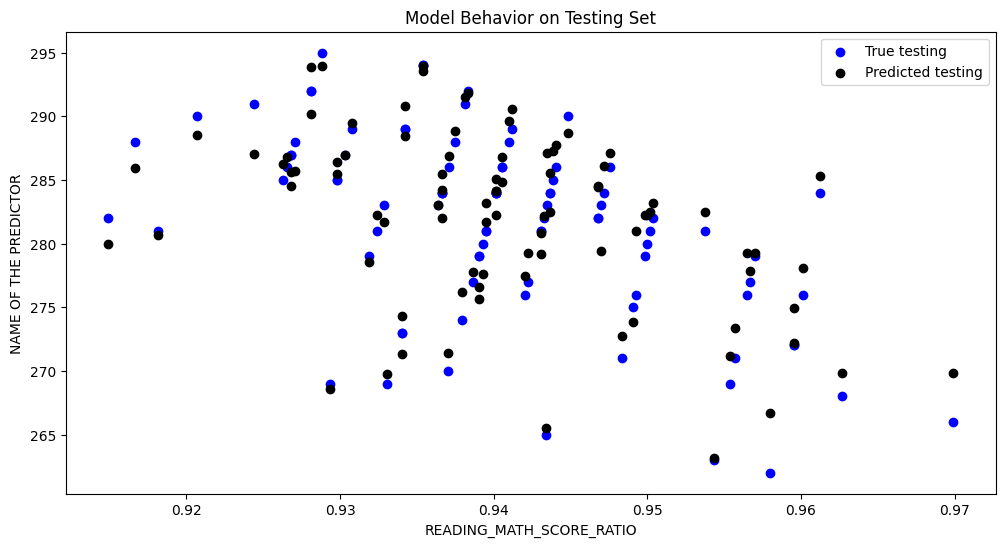

In [76]:
col_name = 'READING_MATH_SCORE_RATIO'

f = plt.figure(figsize=(12, 6))
plt.scatter(X_test[col_name], y_test, color="blue")
plt.scatter(X_test[col_name], model.predict(X_test), color="black")

plt.legend(['True testing', 'Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**In my analysis, the response variable was the Grade 8 Math score. I began by renaming the columns and then checked for null values in the dataset. To address missing data, I attempted to replace null values, particularly in the "Other Expenditure" and "Enroll" columns, using information from other related columns. Next, I conducted exploratory data analysis (EDA) by comparing various features across different states. This allowed me to gain insights into how different factors might influence Grade 8 Math scores. Following EDA, I performed some data engineering tasks. I created a new feature called the "Instructional Expenditure Ratio," which represents the ratio of Instructional Expenditure (IE) to Total Expenditure (TE). Additionally, I calculated the Grade 8 Reading/Math ratio.Subsequently, I explored the relationships between different variables through scatterplots. Notably, strong correlations emerged between Grade 4 and Grade 8 Math scores, as well as between the Reading/Math ratio and Grade 8 Math scores. I also examined the skewness of the Grade 8 Math score distribution and found it to be left-skewed. Moving on to building a linear regression model, I selected relevant features. I checked for null values in the response variable, which, fortunately, were absent. However, if they were present, we would have imputed them using the median due to the left-skewed distribution.**

**For modeling, I split the data into training and testing sets using a 75%-25% split ratio and set the random seed to 42 for reproducibility. I then applied Ridge regression with a penalty coefficient (alpha) of 0.5. I obtained the intercepts, coefficients, and the R-squared ($R^2$) score, which indicated that the model performed well. Subsequently, I calculated the Mean Error, Mean Absolute Error, and Root Mean Square Error to evaluate the model's accuracy and precision.Finally, I created scatterplots to assess the impact of individual predictors on the response variable. The Grade 4 Math score and the Reading/Math ratio appeared to be strong predictors for Grade 8 Math scores, as evident from the last two scatterplots.**